In [2]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

In [3]:
#Read initial data
file_path='rtfDataSet.csv'
df = pd.read_csv(file_path)
print(df.head())

       0      1      2      3      4      5      6      7      8      9  ...  \
0 -0.536  0.292 -0.684  0.123 -0.118  0.346 -0.308 -0.113  0.401 -0.399  ...   
1 -0.496 -0.298 -0.529  0.073 -0.072  0.107 -0.316 -0.066 -0.168 -0.099  ...   
2  0.008 -0.031 -0.240  0.178 -0.120  0.317 -0.481  0.031 -0.077  0.063  ...   
3 -0.188 -0.180 -0.062 -0.104 -0.136 -0.061 -0.216 -0.143  0.068 -0.189  ...   
4  0.038  0.155 -0.203 -0.088 -0.084 -0.164 -0.145 -0.168  0.008  0.143  ...   

      61     62     63     64     65     66     67     68     69  label  
0 -0.135 -0.063 -0.410 -0.223 -0.599 -0.136 -0.329 -0.132 -0.266      0  
1  0.189  0.007 -0.362 -0.151 -0.338 -0.031 -0.159 -0.097 -0.131      0  
2 -0.035  0.101 -0.098 -0.172 -0.290  0.033 -0.342 -0.321 -0.238      0  
3  0.146 -0.145 -0.527 -0.292 -0.663 -0.078 -0.194 -0.151 -0.268      0  
4  0.019 -0.084  0.164 -0.165 -0.126 -0.112  0.029 -0.138  0.148      1  

[5 rows x 71 columns]


In [4]:
#Reduce to sets and normalized
set_1=[1, 5, 10, 13, 14, 16, 17, 19, 25, 26, 29, 30, 36, 46, 51, 57]
set_2=[2, 5, 9, 10, 16, 21, 28, 34, 38, 48, 49, 55, 61, 62, 64]
set_3=[1, 2, 7, 8, 9, 10, 19, 23, 28, 34, 35, 36, 42, 44, 45, 47, 48, 49, 53, 55, 56, 57, 58, 63, 64, 65, 67]
set_4=[2, 3, 12, 16, 21, 23, 28, 34, 35, 45, 48, 50, 53, 61]
set_5=[2, 10, 11, 12, 14, 22, 36, 41, 46, 50, 55, 56, 57, 58, 65]

reduced_df_1=df.iloc[:,set_1]
reduced_df_2=df.iloc[:,set_2]
reduced_df_3=df.iloc[:,set_3]
reduced_df_4=df.iloc[:,set_4]
reduced_df_5=df.iloc[:,set_5]
y = df.iloc[:, -1]

scaler = MinMaxScaler()
reduced_df_1 = scaler.fit_transform(reduced_df_1)
reduced_df_2 = scaler.fit_transform(reduced_df_2)
reduced_df_3 = scaler.fit_transform(reduced_df_3)
reduced_df_4 = scaler.fit_transform(reduced_df_4)
reduced_df_5 = scaler.fit_transform(reduced_df_5)

In [5]:
#Array of sets
reduced_array=[reduced_df_1,reduced_df_2,reduced_df_3,reduced_df_4,reduced_df_5]

In [6]:
#Creacion dinamica de folds y clasificacion y metricas

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
counter=1
print("Naive Bayes")
for X in reduced_array:
    print("Set: ",counter)
    array_accuracy_nb = []
    array_precision_nb = []
    array_recall_nb = []
    array_auc_nb = []
    for fold,(train_index,val_index) in enumerate(stratified_kfold.split(X,y)):
        X_train,X_val=X[train_index],X[val_index]
        y_train,y_val=y[train_index],y[val_index]

        #Naive Bayes
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_pred_nb = clf.predict(X_val)

        accuracy_nb = accuracy_score(y_val, y_pred_nb)
        precision_nb = precision_score(y_val, y_pred_nb)
        recall_nb = recall_score(y_val, y_pred_nb)
        auc=roc_auc_score(y_val, y_pred_nb) 
        array_accuracy_nb.append(accuracy_nb)
        array_precision_nb.append(precision_nb)
        array_recall_nb.append(recall_nb)
        array_auc_nb.append(auc)


    mean_accuracy_nb=np.max(array_accuracy_nb)
    mean_precision_nb=np.max(array_precision_nb)
    mean_recall_nb=np.max(array_recall_nb)
    mean_auc_nb=np.max(array_auc_nb)
    
    print(f"Mean precision: {mean_precision_nb:.2f}")
    print(f"Mean recall: {mean_recall_nb:.2f}")
    print(f"Mean accuracy: {mean_accuracy_nb:.2f}")
    print(f"Mean AUC: {mean_auc_nb:.2f}")
    counter+=1


Naive Bayes
Set:  1
Mean precision: 0.74
Mean recall: 0.75
Mean accuracy: 0.72
Mean AUC: 0.72
Set:  2
Mean precision: 0.82
Mean recall: 0.90
Mean accuracy: 0.78
Mean AUC: 0.78
Set:  3
Mean precision: 0.77
Mean recall: 0.85
Mean accuracy: 0.80
Mean AUC: 0.80
Set:  4
Mean precision: 0.78
Mean recall: 0.90
Mean accuracy: 0.82
Mean AUC: 0.82
Set:  5
Mean precision: 0.79
Mean recall: 0.86
Mean accuracy: 0.78
Mean AUC: 0.78


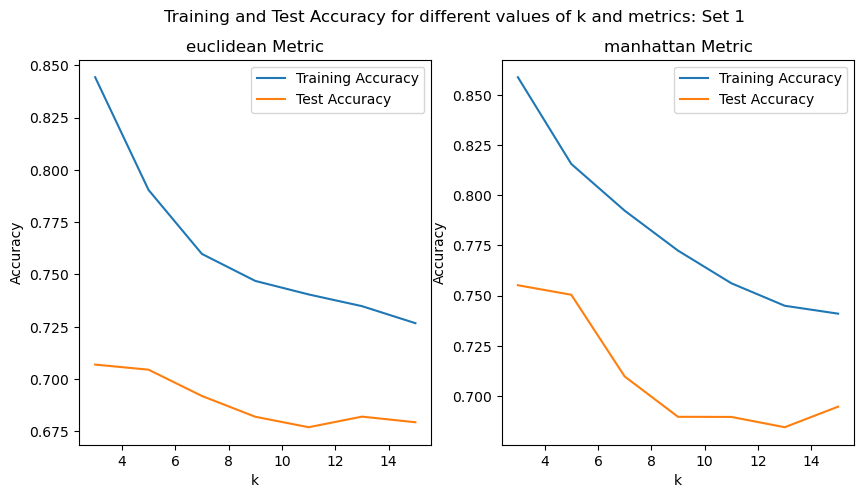

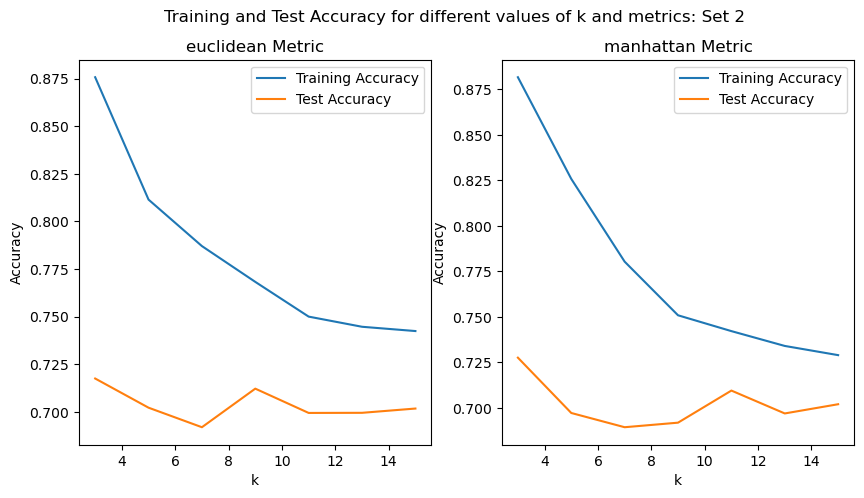

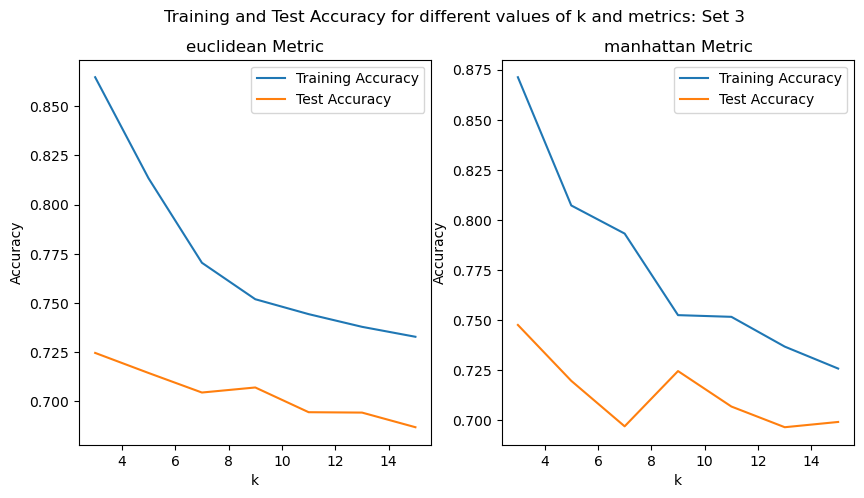

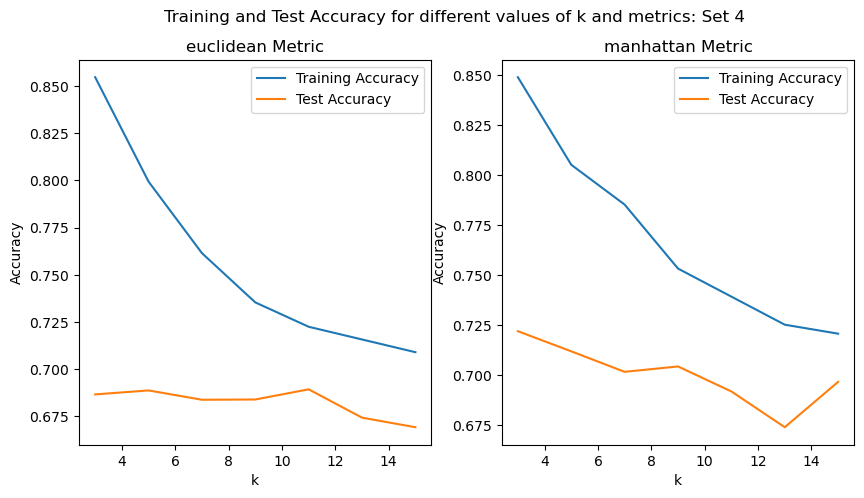

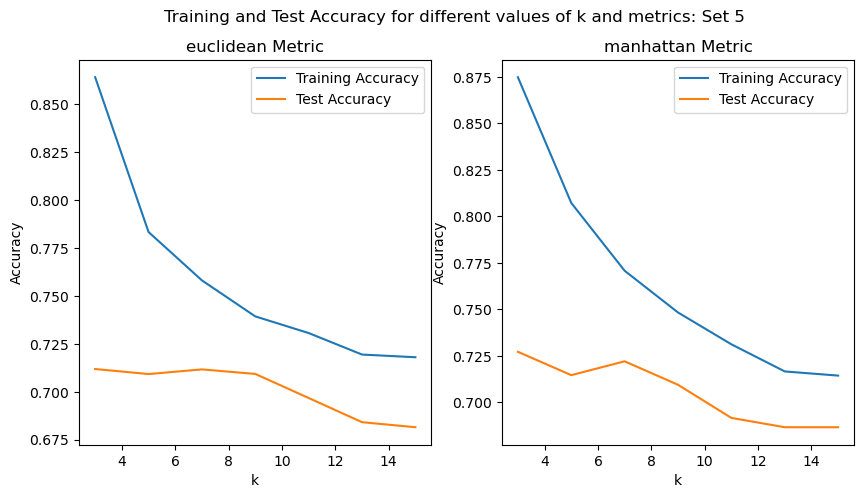

In [7]:
counter = 1
for X in reduced_array:
    # Define the search space
    search_space = {
        "n_neighbors": [3, 5, 7, 9, 11, 13, 15],
        "metric": ["euclidean", "manhattan"]
    }

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Loop over the metrics
    for i, metric in enumerate(search_space["metric"]):
        # Create lists to store the training and test accuracies
        train_accs = []
        test_accs = []

        # Loop over the values of k
        for k in search_space["n_neighbors"]:
            train_accs_fold = []
            test_accs_fold = []

            for fold, (train_index, val_index) in enumerate(stratified_kfold.split(X, y)):
                X_train, X_val = X[train_index], X[val_index]
                y_train, y_val = y[train_index], y[val_index]

                # Create a new KNN classifier with the current value of k and metric
                knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

                # Fit the classifier to the data
                knn.fit(X_train, y_train)

                # Make predictions on the training set
                y_train_pred = knn.predict(X_train)
                # Make predictions on the validation set
                y_val_pred = knn.predict(X_val)

                # Calculate the training and test accuracy
                train_acc = accuracy_score(y_train, y_train_pred)
                test_acc = accuracy_score(y_val, y_val_pred)

                # Add the accuracies to the lists
                train_accs_fold.append(train_acc)
                test_accs_fold.append(test_acc)

            # Calculate the mean training and test accuracy across folds
            train_accs.append(np.mean(train_accs_fold))
            test_accs.append(np.mean(test_accs_fold))

        # Plot the training and test accuracies for the current metric
        axs[i].plot(search_space["n_neighbors"], train_accs, label="Training Accuracy")
        axs[i].plot(search_space["n_neighbors"], test_accs, label="Test Accuracy")
        axs[i].set_title(f"{metric} Metric")
        axs[i].set_xlabel("k")
        axs[i].set_ylabel("Accuracy")
        axs[i].legend()

    fig.suptitle(f"Training and Test Accuracy for different values of k and metrics: Set {counter}")
    # Show the plot
    plt.show()
    counter += 1

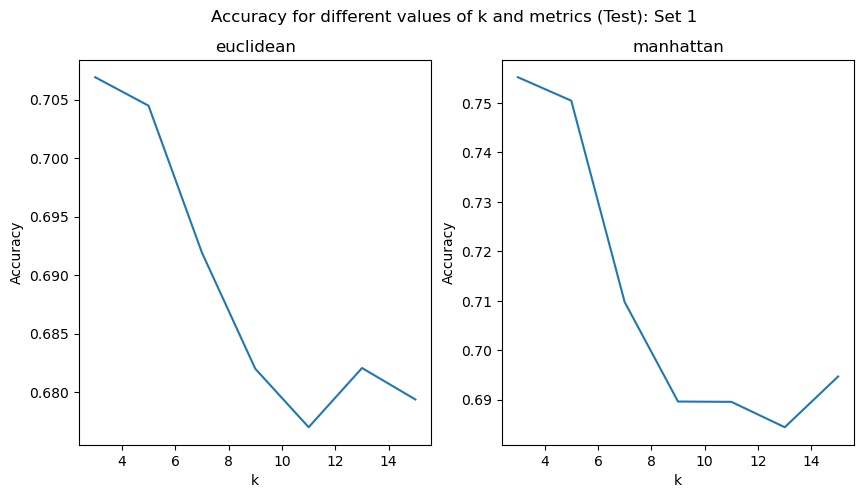

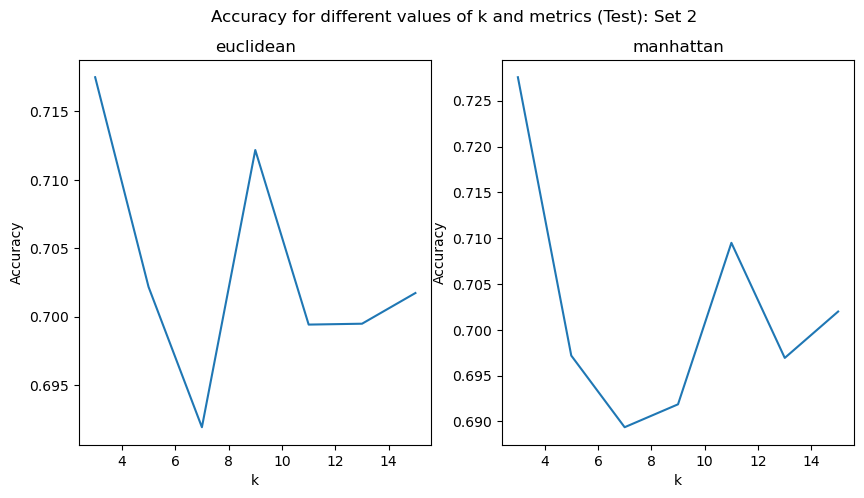

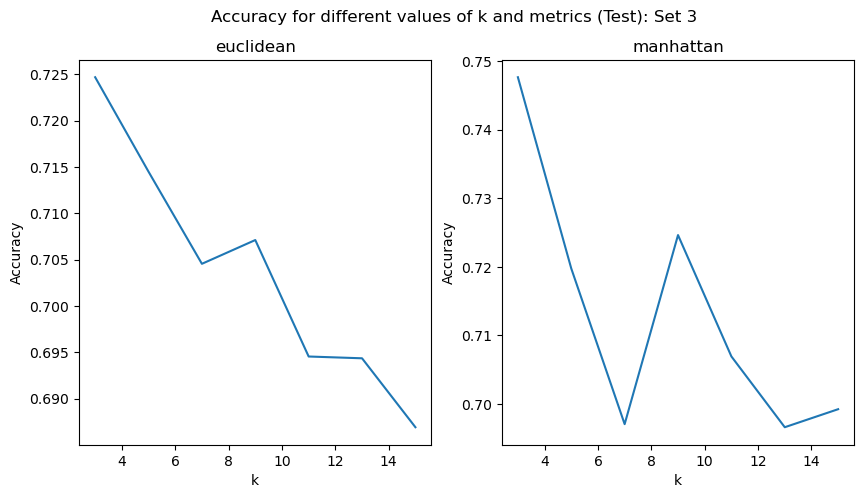

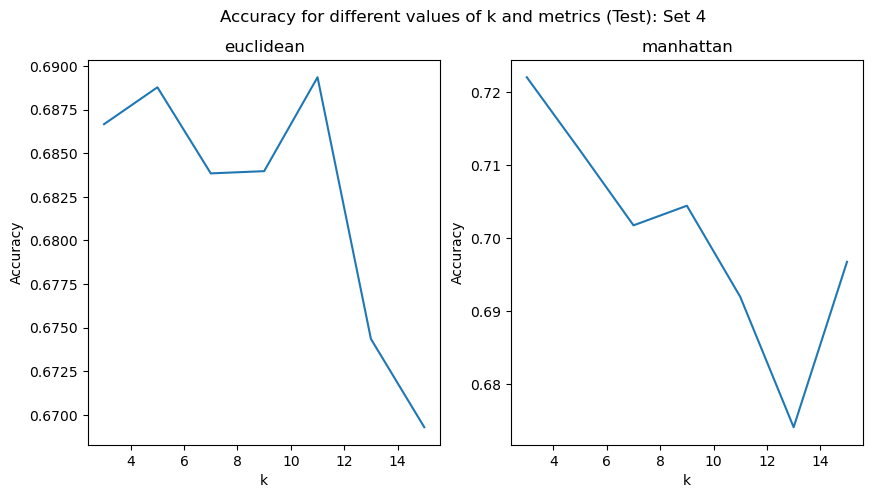

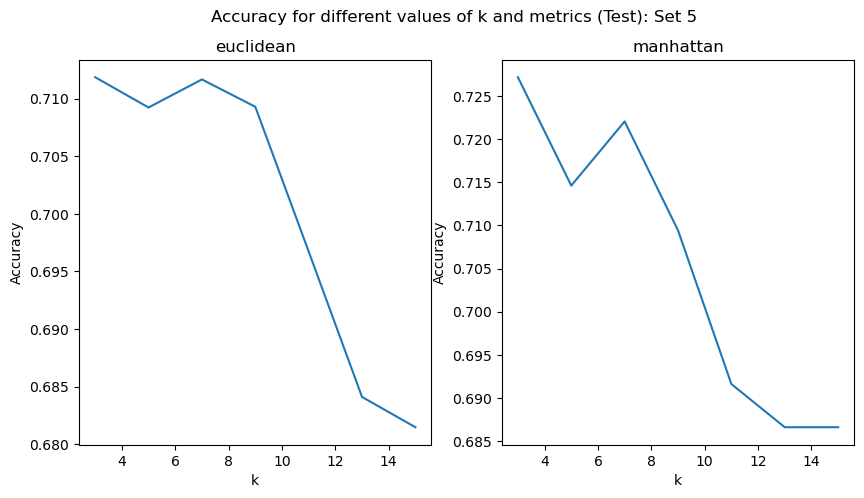

In [12]:
counter=1
for X in reduced_array:

    # Define the search space
    search_space = {
        "n_neighbors": [3,5,7,9,11,13,15],
        "metric": ["euclidean", "manhattan"]
    }

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Loop over the metrics
    for i, metric in enumerate(search_space["metric"]):
        # Create a list to store the accuracies
        accs = []
        # Loop over the values of k
        for k in search_space["n_neighbors"]:
            accs_fold=[]
            for fold,(train_index,val_index) in enumerate(stratified_kfold.split(X,y)):
                X_train,X_val=X[train_index],X[val_index]
                y_train,y_val=y[train_index],y[val_index]
                # Create a new KNN classifier with the current value of k and metric
                knn = KNeighborsClassifier(n_neighbors=k, metric=metric, algorithm="brute")
                # Fit the classifier to the data
                knn.fit(X_train, y_train)
                # Make predictions on the validation set
                y_pred = knn.predict(X_val)
                # Calculate the accuracy
                acc = accuracy_score(y_val, y_pred)
                # Add the accuracy to the list
                accs_fold.append(acc)

            accs.append(np.mean(accs_fold))
        # Plot the accuracies for the current metric
        axs[i].plot(search_space["n_neighbors"], accs)
        axs[i].set_title(metric)
        axs[i].set_xlabel("k")
        axs[i].set_ylabel("Accuracy")

        # Calcula las diferencias entre pares de puntuaciones de ACC
        #second_derivative = np.diff(np.diff(accs))                                                     
        #inflexion_points = [search_space["n_neighbors"][i + 2] for i in range(len(second_derivative) - 1) if second_derivative[i] > 0 and second_derivative[i+1]<0]
        # Encuentra el valor óptimo de k
        #best_k = inflexion_points[0]  # Puedes ajustar esto para seleccionar el punto de inflexión deseado
        #print(f'El valor óptimo de k basado en puntos de inflexión es {best_k}')
    
    fig.suptitle(f"Accuracy for different values of k and metrics (Test): Set {counter}")
    # Show the plot
    plt.show()
    counter+=1


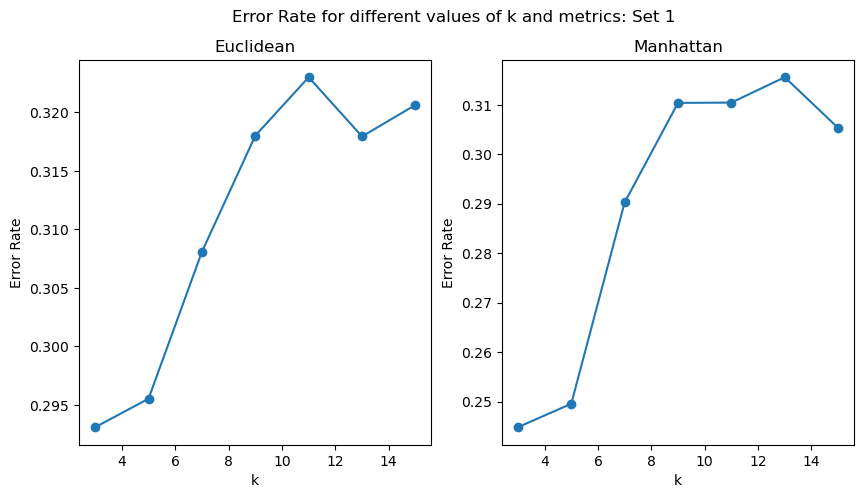

Optimal parameters for dataset 1 are {'metric': 'manhattan', 'n_neighbors': 3}
Best cross-validation accuracy: 0.76
Test set score: 0.86


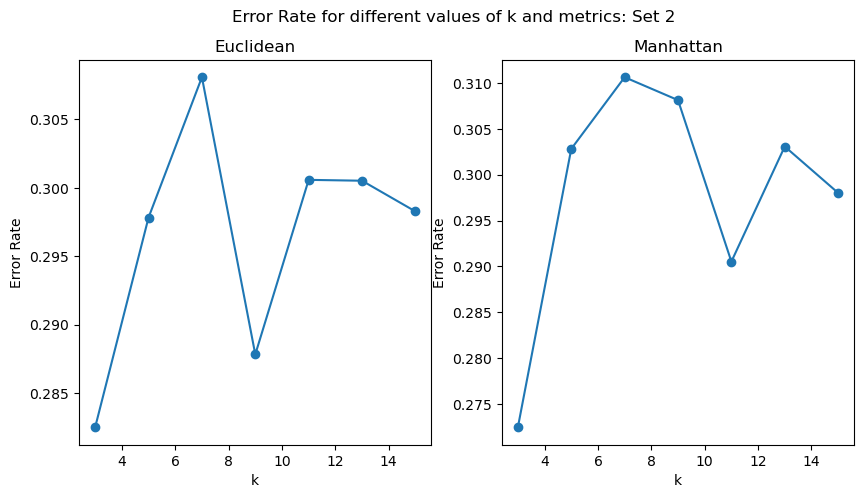

Optimal parameters for dataset 2 are {'metric': 'manhattan', 'n_neighbors': 3}
Best cross-validation accuracy: 0.73
Test set score: 0.89


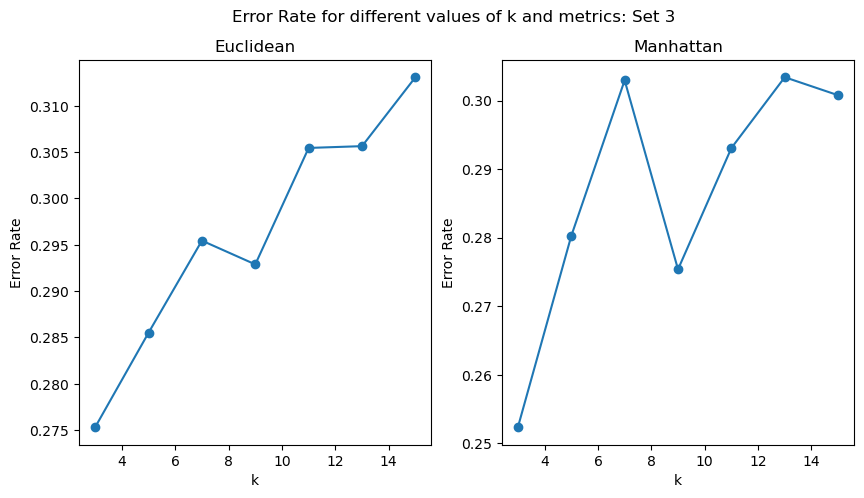

Optimal parameters for dataset 3 are {'metric': 'manhattan', 'n_neighbors': 3}
Best cross-validation accuracy: 0.75
Test set score: 0.87


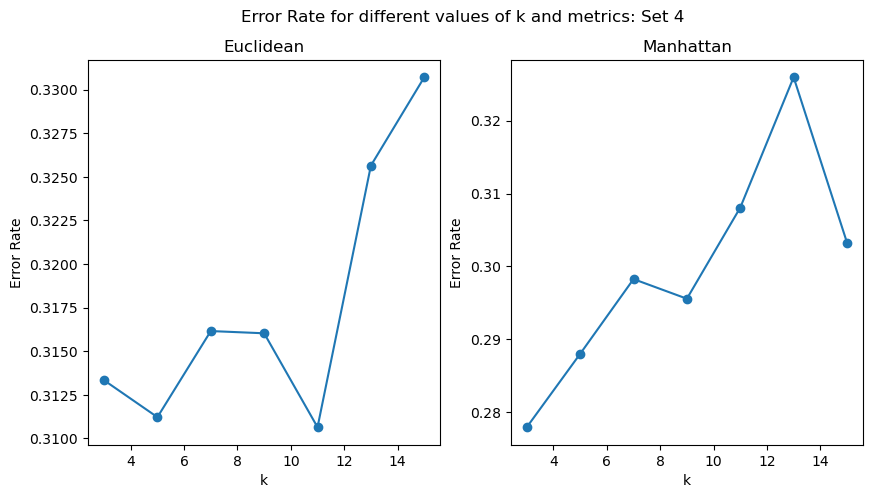

Optimal parameters for dataset 4 are {'metric': 'manhattan', 'n_neighbors': 3}
Best cross-validation accuracy: 0.72
Test set score: 0.85


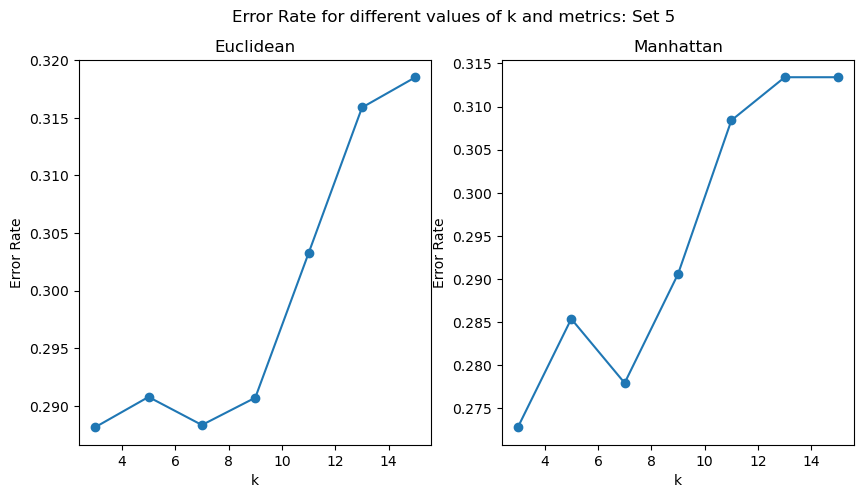

Optimal parameters for dataset 5 are {'metric': 'manhattan', 'n_neighbors': 3}
Best cross-validation accuracy: 0.73
Test set score: 0.88


In [9]:
counter = 0
best_knns = []

# For each dataset in reduced_array
for X in reduced_array:
    counter += 1

    # Create a new KNN classifier
    knn = KNeighborsClassifier()

    param_grid = {
        "n_neighbors": [3, 5, 7, 9, 11, 13, 15],
        "metric": ["euclidean", "manhattan"]
    }

    grid_search = GridSearchCV(knn, param_grid, cv=stratified_kfold, scoring='accuracy', verbose=0, return_train_score=True)


    grid_search.fit(X, y)
    
    results = grid_search.cv_results_
    euclidean_error = 1 - results['mean_test_score'][results['param_metric'] == 'euclidean']
    manhattan_error = 1 - results['mean_test_score'][results['param_metric'] == 'manhattan']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    
    axs[0].plot(param_grid["n_neighbors"], euclidean_error, marker='o')
    axs[0].set_title("Euclidean")
    axs[0].set_xlabel("k")
    axs[0].set_ylabel("Error Rate")
    
    axs[1].plot(param_grid["n_neighbors"], manhattan_error, marker='o')
    axs[1].set_title("Manhattan")
    axs[1].set_xlabel("k")
    axs[1].set_ylabel("Error Rate")

    fig.suptitle(f"Error Rate for different values of k and metrics: Set {counter}")
    
    plt.show()

    print(f"Optimal parameters for dataset {counter} are {grid_search.best_params_}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")
    print(f"Test set score: {grid_search.score(X, y):.2f}")



In [10]:
for n, X in enumerate(reduced_array):
    print(f"Set {n+1}")

    # Create a list to store the accuracies
    accs = []
    precisions = []
    recalls = []
    aucs = [] 

    for i, metric in enumerate(search_space["metric"]):

        accs_metric=[]
        precisions_metric=[]
        recalls_metric=[]
        aucs_metric=[]

        for fold,(train_index,val_index) in enumerate(stratified_kfold.split(X,y)):
            X_train,X_val=X[train_index],X[val_index]
            y_train,y_val=y[train_index],y[val_index]
            # Create a new KNN classifier with the current value of k and metric
            knn = KNeighborsClassifier(n_neighbors=3, metric=metric, algorithm="brute")
            # Fit the classifier to the data
            knn.fit(X_train, y_train)
            # Make predictions on the validation set
            y_pred = knn.predict(X_val)
            # Calculate the accuracy
            acc = accuracy_score(y_val, y_pred)
            precision = precision_score(y_val, y_pred)
            recall = recall_score(y_val, y_pred)
            auc = roc_auc_score(y_val, y_pred)
            # Add the accuracy to the list
            accs_metric.append(acc)
            precisions_metric.append(precision)
            recalls_metric.append(recall)
            aucs_metric.append(auc)
        
        accs.append(np.max(accs_metric))
        precisions.append(np.max(precisions_metric))
        recalls.append(np.mean(recalls_metric))
        aucs.append(np.max(aucs_metric))
        
    print(f"Accuracy:  euclidean {accs[0]:.2f}  manhattan {accs[1]:.2f}")
    print(f"Precision: euclidean {precisions[0]:.2f}  manhattan {precisions[1]:.2f}")
    print(f"Recall:    euclidean {recalls[0]:.2f}  manhattan {recalls[1]:.2f}")
    print(f"AUC:       euclidean {aucs[0]:.2f}  manhattan {aucs[1]:.2f}")


Set 1
Accuracy:  euclidean 0.80  manhattan 0.85
Precision: euclidean 0.76  manhattan 0.79
Recall:    euclidean 0.83  manhattan 0.90
AUC:       euclidean 0.80  manhattan 0.84
Set 2
Accuracy:  euclidean 0.85  manhattan 0.82
Precision: euclidean 0.82  manhattan 0.82
Recall:    euclidean 0.87  manhattan 0.88
AUC:       euclidean 0.84  manhattan 0.82
Set 3
Accuracy:  euclidean 0.80  manhattan 0.85
Precision: euclidean 0.73  manhattan 0.79
Recall:    euclidean 0.90  manhattan 0.90
AUC:       euclidean 0.80  manhattan 0.85
Set 4
Accuracy:  euclidean 0.82  manhattan 0.85
Precision: euclidean 0.74  manhattan 0.83
Recall:    euclidean 0.88  manhattan 0.91
AUC:       euclidean 0.82  manhattan 0.85
Set 5
Accuracy:  euclidean 0.80  manhattan 0.85
Precision: euclidean 0.77  manhattan 0.77
Recall:    euclidean 0.87  manhattan 0.90
AUC:       euclidean 0.80  manhattan 0.84
